In [2]:
import torch, torchvision
import mmdet

print(torch.__version__, torch.cuda.is_available())
print(mmdet.__version__)

1.10.2+cu113 True
2.22.0


In [3]:
%load_ext autoreload
%autoreload 2
from mmdet.apis import inference_detector, init_detector, show_result_pyplot

config = '/home/austin/work/3rd/mmdetection/configs/yolo/yolov3_d53_mstrain-416_273e_coco.py'
checkpoint = '/workspace/datasets/mmcv/models/yolov3_d53_mstrain-416_273e_coco-2b60fcd9.pth'

mmdet_cfg = '/home/austin/work/3rd/mmdetection/configs/centernet/centernet_resnet18_140e_coco.py'
mmdet_model = '/workspace/datasets/model_zoo/mmdet/centernet_resnet18_140e_coco_20210705_093630-bb5b3bf7.pth'

# initialize the detector
model = init_detector(mmdet_cfg, mmdet_model, device='cuda:3')

load checkpoint from local path: /workspace/datasets/model_zoo/mmdet/centernet_resnet18_140e_coco_20210705_093630-bb5b3bf7.pth


In [7]:
from mmdet.datasets.pipelines import Compose

test_pipeline = [
    dict(type='LoadImageFromFile', to_float32=True),
    dict(
        type='MultiScaleFlipAug',
        img_scale=(512, 512),
        flip=False,
        transforms=[
            dict(type='Resize', keep_ratio=True),
            dict(
                type='RandomCenterCropPad',
                ratios=None,
                border=None,
                mean=[0, 0, 0],
                std=[1, 1, 1],
                to_rgb=True,
                test_mode=True,
                test_pad_mode=['logical_or', 0],
                test_pad_add_pix=0),
            dict(type='Pad', pad_to_square=True),]
    ),
]

img = '../data/dog.jpg'
test_pipeline = Compose(test_pipeline)
data = dict(img_info=dict(filename=img), img_prefix=None)
data = test_pipeline(data)

data['img'][0].shape

(512, 512, 3)

In [9]:
model

CenterNet(
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): ResLayer(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
      )
      init_cfg={'type': 'Constant', 'val': 0, 'override': {'name': 'norm2'}}
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)


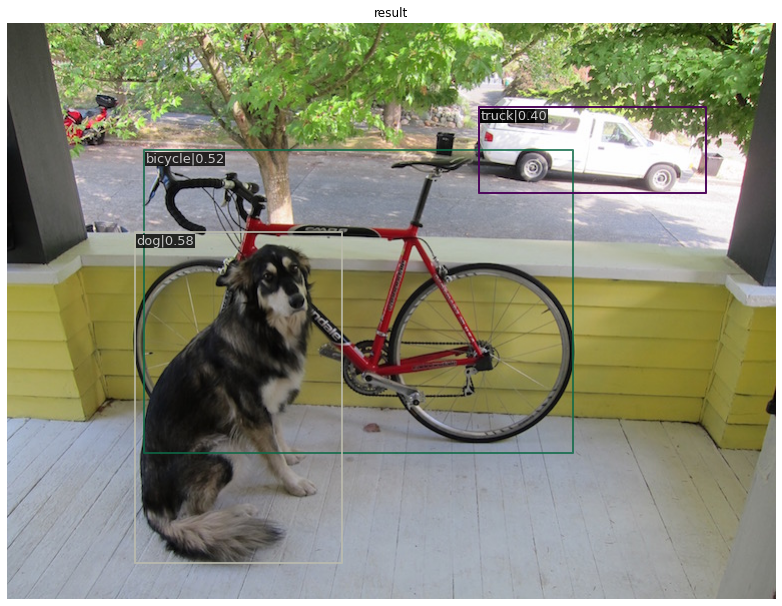

In [47]:
img = '../data/dog.jpg'
result = inference_detector(model, img)

show_result_pyplot(model, img, result, score_thr=0.3)